In [1]:
# Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)

### Going over the dataset to gain some insights

In [2]:
crash_census_df = pd.read_csv('Traffic_Crashes_-_Crashes.csv')
crash_census_df.head(5)

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,7/10/19 17:56,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,ONE-WAY,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",7/10/19 18:16,IMPROPER BACKING,2,0.0,0.0,0.0,0.0,0.0,17,4,7
1,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,6/30/17 16:00,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,Y,NaN,NaN,"OVER $1,500",6/30/17 16:01,FAILING TO YIELD RIGHT-OF-WAY,2,0.0,0.0,0.0,0.0,0.0,16,6,6
2,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,7/10/20 10:25,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",7/10/20 10:25,FAILING TO YIELD RIGHT-OF-WAY,3,0.0,0.0,0.0,0.0,0.0,10,6,7
3,f8960f698e870ebdc60b521b2a141a5395556bc3704191...,7/11/20 1:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,NaN,NaN,Y,$500 OR LESS,7/11/20 8:30,UNABLE TO DETERMINE,2,0.0,0.0,0.0,0.0,0.0,1,7,7
4,8eaa2678d1a127804ee9b8c35ddf7d63d913c14eda61d6...,7/8/20 14:00,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DRIVEWAY,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",7/8/20 14:15,UNABLE TO DETERMINE,2,0.0,0.0,0.0,0.0,0.0,14,4,7


##### Number of rows and columns in the dataset


In [3]:
crash_census_df.shape

(481623, 27)

##### Listening all the columns in the dataset


In [4]:
crash_census_df.columns

Index(['CRASH_RECORD_ID', 'CRASH_DATE', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE',
       'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY', 'HIT_AND_RUN_I', 'DAMAGE',
       'DATE_POLICE_NOTIFIED', 'PRIM_CONTRIBUTORY_CAUSE', 'NUM_UNITS',
       'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
       'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
       'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH'],
      dtype='object')

##### Summary statistics of the dataset


In [5]:
crash_census_df.describe()

,POSTED_SPEED_LIMIT,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
count,481623.000000,481623.000000,480659.000000,480659.000000,480659.000000,480659.000000,480659.000000,481623.000000,481623.000000,481623.000000
mean,28.296489,2.032058,0.176042,0.001061,0.019188,0.097524,0.058268,13.226403,4.128372,6.722227
std,6.485139,0.440945,0.546556,0.035491,0.162562,0.403710,0.310368,5.491833,1.973717,3.504660
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,30.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,2.000000,4.000000
50%,30.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,4.000000,7.000000
75%,30.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,6.000000,10.000000
max,99.000000,18.000000,21.000000,4.000000,7.000000,21.000000,15.000000,23.000000,7.000000,12.000000


### 1. The data set need cleaning. Decide what to do with missing values and extra attributes.

##### Listening all the columns containing missing values in the dataset


In [6]:
crash_census_df.isna().sum()

CRASH_RECORD_ID                       0
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
CRASH_TYPE                            0
INTERSECTION_RELATED_I           372958
NOT_RIGHT_OF_WAY                 458971
HIT_AND_RUN_I                    340155
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
NUM_UNITS                             0
INJURIES_TOTAL                      964
INJURIES_FATAL                      964
INJURIES_INCAPACITATING             964
INJURIES_NON_INCAPACITATING         964
INJURIES_REPORTED_NOT_EVIDENT       964
CRASH_HOUR                            0


##### Finding missing data percent and listening all the columns where percent is greater than zero


In [7]:
missing_value = crash_census_df.isna().sum().sort_values(ascending=False)
missing_percent = (missing_value/len(crash_census_df))*100
missing_percent[missing_percent!=0]

NOT_RIGHT_OF_WAY                 95.296736
INTERSECTION_RELATED_I           77.437747
HIT_AND_RUN_I                    70.626818
INJURIES_REPORTED_NOT_EVIDENT     0.200157
INJURIES_NON_INCAPACITATING       0.200157
INJURIES_INCAPACITATING           0.200157
INJURIES_FATAL                    0.200157
INJURIES_TOTAL                    0.200157
dtype: float64

###### Plotting missing percent to get the visual view


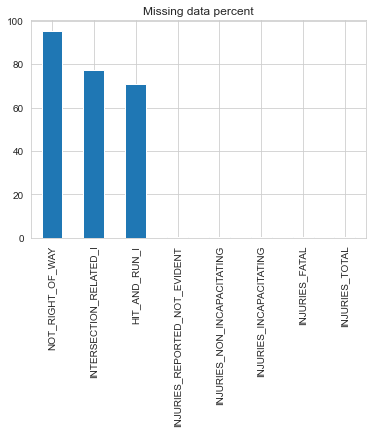

In [8]:
missing_percent[missing_percent!=0].plot(kind='bar')
plt.title("Missing data percent");

####  Looking at the visuals,  NOT_RIGHT_OF_WAY column have 95% of the values missing, thus analysis using NOT_RIGHT_OF_WAY column will distort finding, hence dropping this column


In [9]:
crash_census = crash_census_df.copy()
crash_census.drop(['NOT_RIGHT_OF_WAY'], axis = 1, inplace = True)
crash_census.shape


(481623, 26)

##### Filling the NaN values in INTERSECTION_RELATED_I with unknown


In [10]:
crash_census["INTERSECTION_RELATED_I"].fillna("unknown", inplace = True)
crash_census['INTERSECTION_RELATED_I'].value_counts()

unknown    372958
Y          103544
N            5121
Name: INTERSECTION_RELATED_I, dtype: int64

##### Filling the NaN values in HIT_AND_RUN_I with unknown


In [11]:
crash_census["HIT_AND_RUN_I"].fillna("unknown", inplace = True)
crash_census['HIT_AND_RUN_I'].value_counts()

unknown    340155
Y          135305
N            6163
Name: HIT_AND_RUN_I, dtype: int64

##### Checking unique values of INJURIES_REPORTED_NOT_EVIDENT


In [12]:
crash_census['INJURIES_REPORTED_NOT_EVIDENT'].value_counts()

0.0     459276
1.0      16748
2.0       3359
3.0        857
4.0        258
5.0        108
6.0         23
7.0         11
8.0          6
9.0          6
10.0         4
15.0         2
11.0         1
Name: INJURIES_REPORTED_NOT_EVIDENT, dtype: int64

##### Checking unique values of INJURIES_NON_INCAPACITATING


In [13]:
crash_census['INJURIES_NON_INCAPACITATING'].value_counts()

0.0     445059
1.0      28135
2.0       5101
3.0       1513
4.0        537
5.0        187
6.0         76
7.0         26
8.0          7
10.0         5
11.0         4
9.0          3
21.0         2
18.0         1
16.0         1
14.0         1
12.0         1
Name: INJURIES_NON_INCAPACITATING, dtype: int64

##### Checking unique values of INJURIES_INCAPACITATING


In [14]:
crash_census['INJURIES_INCAPACITATING'].value_counts()

0.0    472771
1.0      6911
2.0       724
3.0       172
4.0        62
5.0        15
6.0         3
7.0         1
Name: INJURIES_INCAPACITATING, dtype: int64

##### Checking unique values of INJURIES_FATAL


In [15]:
crash_census['INJURIES_FATAL'].value_counts()

0.0    480189
1.0       437
2.0        27
3.0         5
4.0         1
Name: INJURIES_FATAL, dtype: int64

##### Checking unique values of INJURIES_TOTAL


In [16]:
crash_census['INJURIES_TOTAL'].value_counts()

0.0     418952
1.0      46745
2.0      10103
3.0       3072
4.0       1095
5.0        410
6.0        161
7.0         60
8.0         20
9.0         14
10.0         9
15.0         5
11.0         5
21.0         2
13.0         2
12.0         2
19.0         1
16.0         1
Name: INJURIES_TOTAL, dtype: int64

##### Filling the NaN values in INJURIES_NON_INCAPACITATING,  INJURIES_INCAPACITATING,  INJURIES_FATAL, INJURIES_TOTAL with '0'


In [17]:
 crash_census[['INJURIES_NON_INCAPACITATING', 'INJURIES_INCAPACITATING', 'INJURIES_FATAL', 'INJURIES_TOTAL']].fillna(value=0)

,INJURIES_NON_INCAPACITATING,INJURIES_INCAPACITATING,INJURIES_FATAL,INJURIES_TOTAL
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
...,...,...,...,...
481618,0.0,0.0,0.0,0.0
481619,0.0,0.0,0.0,0.0
481620,0.0,0.0,0.0,0.0
481621,0.0,0.0,0.0,0.0


##### Dropping CRASH_RECORD_ID as it is not playing any major role in doing the analysis, its an extra attribute 


In [18]:
crash_census.drop(['CRASH_RECORD_ID'], axis = 1, inplace = True)
crash_census.shape

(481623, 25)

#### Cleaing the data:
The following columns had missing values "NOT_RIGHT_OF_WAY, INTERSECTION_RELATED_I, HIT_AND_RUN_I, INJURIES_REPORTED_NOT_EVIDENT, INJURIES_NON_INCAPACITATING, INJURIES_INCAPACITATING, INJURIES_FATAL, INJURIES_TOTAL"

###### Dealing with missing values:

 -Filled the NaN values in INTERSECTION_RELATED_I, HIT_AND_RUN_I with __'unknown'__
 
 -Filled the NaN values in INJURIES_NON_INCAPACITATING,  INJURIES_INCAPACITATING,  INJURIES_FATAL, INJURIES_TOTAL with __'0'__
 
 -Dropped NOT_RIGHT_OF_WAY column since __95%__ of the values were missing
 
 -Dropped CRASH_RECORD_ID as it was an __extra attribute__

### 2. Some attributes are more useful if you break them into several attributes.

##### Breaking down CRASH_DATE attribute into smaller attributes to gain more information


In [19]:
crash_census['CRASH_DATE']

0         7/10/19 17:56
1         6/30/17 16:00
2         7/10/20 10:25
3          7/11/20 1:00
4          7/8/20 14:00
              ...      
481618     1/18/21 9:00
481619    1/19/21 21:23
481620    1/20/21 20:20
481621    1/20/21 17:00
481622    1/20/21 17:50
Name: CRASH_DATE, Length: 481623, dtype: object

##### 'CRASH_DATE'  data type is objet, converting it to datetime data type


In [20]:
crash_census['CRASH_DATE'] = pd.to_datetime(crash_census['CRASH_DATE'])
crash_census['CRASH_DATE']

0        2019-07-10 17:56:00
1        2017-06-30 16:00:00
2        2020-07-10 10:25:00
3        2020-07-11 01:00:00
4        2020-07-08 14:00:00
                 ...        
481618   2021-01-18 09:00:00
481619   2021-01-19 21:23:00
481620   2021-01-20 20:20:00
481621   2021-01-20 17:00:00
481622   2021-01-20 17:50:00
Name: CRASH_DATE, Length: 481623, dtype: datetime64[ns]

##### Extracting year from the 'CRASH_DATE' column


In [21]:
crash_census['CRASH_YEAR'] = pd.DatetimeIndex(crash_census['CRASH_DATE']).year
crash_census['CRASH_YEAR']

0         2019
1         2017
2         2020
3         2020
4         2020
          ... 
481618    2021
481619    2021
481620    2021
481621    2021
481622    2021
Name: CRASH_YEAR, Length: 481623, dtype: int64

##### Breaking down CRASH_DATE attribute into smaller attributes to gain more information


In [22]:
crash_census.head()

,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,INTERSECTION_RELATED_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,CRASH_YEAR
0,2019-07-10 17:56:00,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,ONE-WAY,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,unknown,unknown,"OVER $1,500",7/10/19 18:16,IMPROPER BACKING,2,0.0,0.0,0.0,0.0,0.0,17,4,7,2019
1,2017-06-30 16:00:00,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,Y,unknown,"OVER $1,500",6/30/17 16:01,FAILING TO YIELD RIGHT-OF-WAY,2,0.0,0.0,0.0,0.0,0.0,16,6,6,2017
2,2020-07-10 10:25:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,unknown,unknown,"OVER $1,500",7/10/20 10:25,FAILING TO YIELD RIGHT-OF-WAY,3,0.0,0.0,0.0,0.0,0.0,10,6,7,2020
3,2020-07-11 01:00:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,unknown,Y,$500 OR LESS,7/11/20 8:30,UNABLE TO DETERMINE,2,0.0,0.0,0.0,0.0,0.0,1,7,7,2020
4,2020-07-08 14:00:00,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DRIVEWAY,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,unknown,unknown,"OVER $1,500",7/8/20 14:15,UNABLE TO DETERMINE,2,0.0,0.0,0.0,0.0,0.0,14,4,7,2020


==> Broken down __CRASH_DATE__ attribute.

   Droping __CRASH_DATE__ attribute as this attribute has now been broken down into several attributes in the data set where the time, day, and month, year of the crash are given as separate attributes.


In [23]:
crash_census.drop(['CRASH_DATE'], axis = 1, inplace = True)
crash_census.shape

(481623, 25)

### 3. What are some insights about the crashes and date/time? You can look into season, day of the week, day/night, lightning, weather, etc.

##### Observing CRASH_HOUR


C:\Users\nehad\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CRASH_HOUR'>

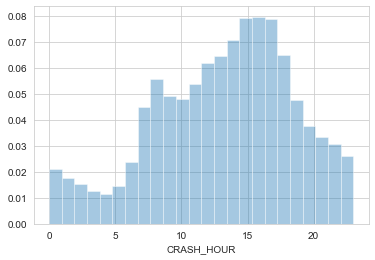

In [24]:
sns.distplot(crash_census['CRASH_HOUR'], bins=24, norm_hist=True ,kde=False)

==> From the above graph we can conclude that most of the accidents occur during __14:00 to 16:00 hour__ timeframe


##### Observing CRASH_DAY_OF_WEEK


<AxesSubplot:xlabel='CRASH_DAY_OF_WEEK'>

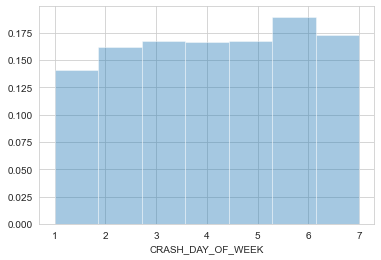

In [25]:
sns.distplot(crash_census['CRASH_DAY_OF_WEEK'], bins=7, norm_hist=True, kde=False)

==> From the above graph we can conclude that almost everyday of the week has the same number of accidents but __Saturday__ has the most accident.


##### Observing CRASH_MONTH


<AxesSubplot:xlabel='CRASH_MONTH'>

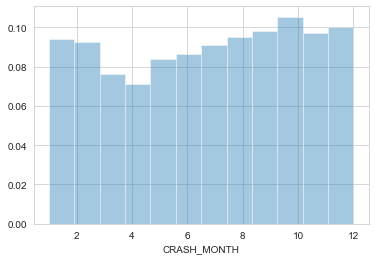

In [26]:
sns.distplot(crash_census['CRASH_MONTH'], bins=12, norm_hist=True, kde=False)

==> From the above graph we can conclude that most of the accidents occur during __October__ month


##### Observing Weekend (Saturday and Sunday) data


C:\Users\nehad\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CRASH_HOUR'>

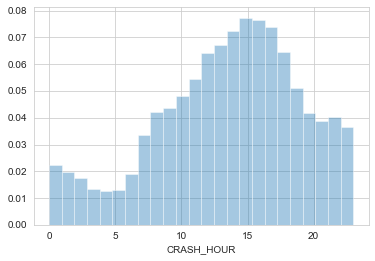

In [27]:
weekend_data = crash_census[(crash_census['CRASH_DAY_OF_WEEK']==6) | (crash_census['CRASH_DAY_OF_WEEK']==7)]
weekend_data['CRASH_HOUR'].value_counts().sort_values(ascending=False)
sns.distplot(weekend_data['CRASH_HOUR'], bins=24, norm_hist=True, kde=False)


==> From the above graph we can conclude that most accidents occur during during __14:00 to 15:00 hour__ timeframe on __weekends__.


##### Observing Weekday (Monday - Friday) data


C:\Users\nehad\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CRASH_HOUR'>

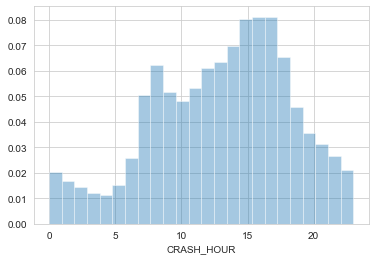

In [28]:
weekday_data = crash_census[(crash_census['CRASH_DAY_OF_WEEK']!=6) & (crash_census['CRASH_DAY_OF_WEEK']!=7)]
weekday_data['CRASH_HOUR'].value_counts().sort_values(ascending=False)
sns.distplot(weekday_data['CRASH_HOUR'], bins=24, norm_hist=True, kde=False)


==> From the above graph we can conclude that most accidents occur during __14:00 to 16:00 hour__ timeframe on __weekdays__ (Monday to Friday)




### 4. Has number of deadly crashes increased recently? Look at the data over the years. Can you identify any significant increase/decrease?

<AxesSubplot:>

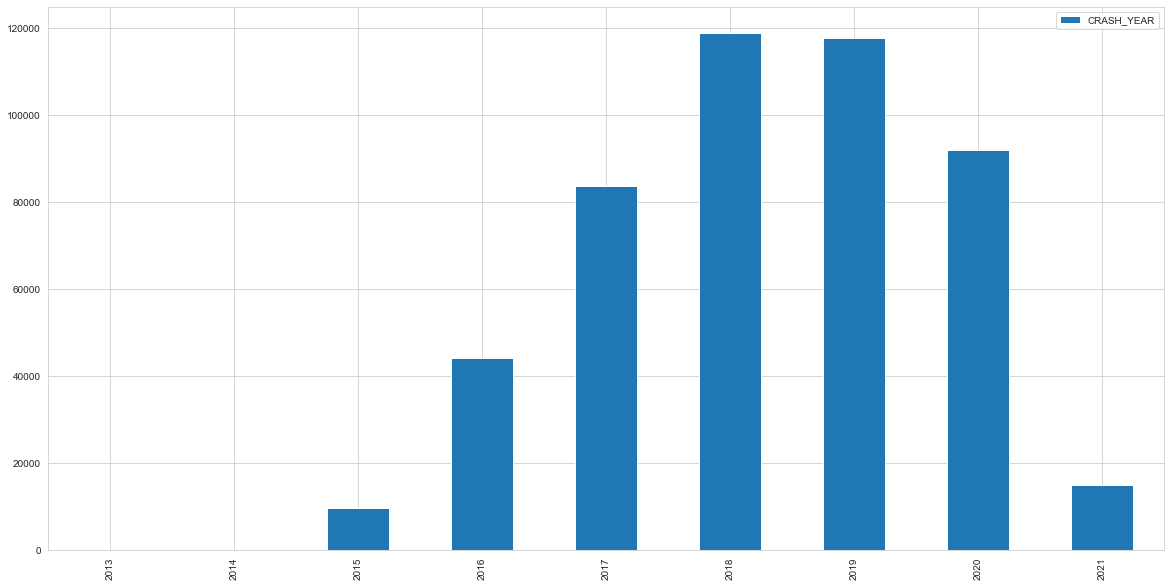

In [29]:
#crash data over the years.
pd.DataFrame(crash_census['CRASH_YEAR'].value_counts().sort_index()).plot(kind = 'bar', figsize = (20,10))


==> From the above graph we can conclude that the injuries increased till the year __2018 to 2019__. (There is not enough data for the year 2020 and 2021, possibly because of pandemic)


### 5. Investigate number and type of injuries based on the speed limit.

Text(0, 0.5, 'Total')

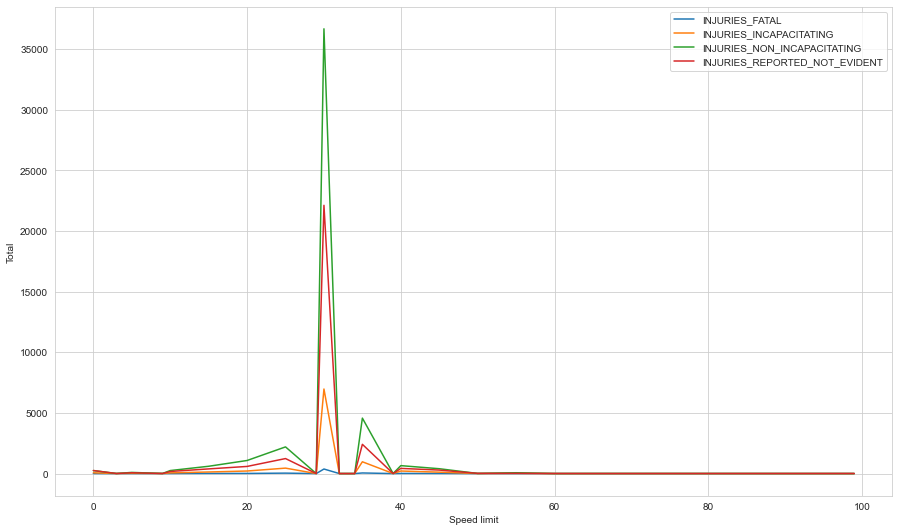

In [30]:

injury_types = ['INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT']

crash_census_no_zero = crash_census[crash_census['INJURIES_TOTAL'] > 0]

crash_by_types = crash_census_no_zero.groupby(['POSTED_SPEED_LIMIT'])[
    injury_types
].sum()
plt = crash_by_types.plot(figsize=(15,9))
plt.set_xlabel("Speed limit")
plt.set_ylabel("Total")


==> From the above graph we can infer that there is a spike in number of injuries when __speed limit is 30__.


### 6. Is there a relationship between hit and run crashes and number of fatal injuries?

In [31]:
df_hit_and_run = crash_census['HIT_AND_RUN_I']
df_hit_and_run.head(5)

0    unknown
1    unknown
2    unknown
3          Y
4    unknown
Name: HIT_AND_RUN_I, dtype: object

In [32]:
df1_witout_unknown = crash_census[crash_census['HIT_AND_RUN_I'] != 'unknown']

df2__witout_unknown = df1_witout_unknown.replace({'HIT_AND_RUN_I' : { 'Y' : 1, 'N' : 0}})
df2__witout_unknown['HIT_AND_RUN_I'].value_counts()


1    135305
0      6163
Name: HIT_AND_RUN_I, dtype: int64

In [33]:
df2_Corr = df2__witout_unknown[['INJURIES_FATAL', 'HIT_AND_RUN_I']].corr()
df2_Corr

,INJURIES_FATAL,HIT_AND_RUN_I
INJURIES_FATAL,1.000000,-0.004078
HIT_AND_RUN_I,-0.004078,1.000000


<AxesSubplot:>

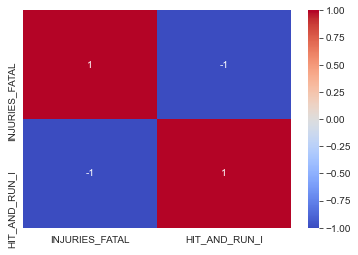

In [34]:
sns.heatmap(df2_Corr.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

==> After observing the values from the heatmap, we can conclude that there is __no co-realtion__ between INJURIES_FATAL and HIT_AND_RUN_I as we are getting a negative co-relation

### 7. Do intersection-related crashes result in more fatal injuries?

<AxesSubplot:>

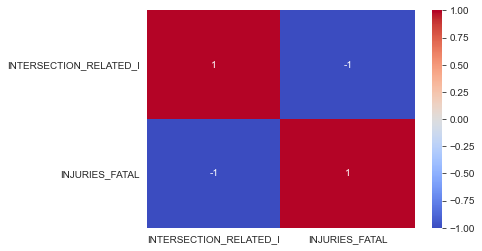

In [35]:

crash_census = crash_census[crash_census['INTERSECTION_RELATED_I'] != 'unknown']

crash_census.replace({'INTERSECTION_RELATED_I' : { 'Y' : 1, 'N' : 0}}, inplace=True)
crash_census['INTERSECTION_RELATED_I'].corr(crash_census['INJURIES_FATAL'])

intersection_injuries_df = crash_census[['INTERSECTION_RELATED_I', 'INJURIES_FATAL']].corr()

sns.heatmap(intersection_injuries_df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

==> After observing the values from the heatmap, we can conclude that there is __no co-relation__ between intersection-related crashes and fatal injuries

### 8. Come up with at least two more interesting insights and visualize them.

##### 8.1 Observing WEATHER_CONDITION


In [36]:
crash_census['WEATHER_CONDITION'].value_counts()

CLEAR                       85228
RAIN                        11579
SNOW                         4492
CLOUDY/OVERCAST              4052
UNKNOWN                      2304
OTHER                         362
SLEET/HAIL                    215
FOG/SMOKE/HAZE                210
FREEZING RAIN/DRIZZLE         159
BLOWING SNOW                   40
SEVERE CROSS WIND GATE         23
BLOWING SAND, SOIL, DIRT        1
Name: WEATHER_CONDITION, dtype: int64

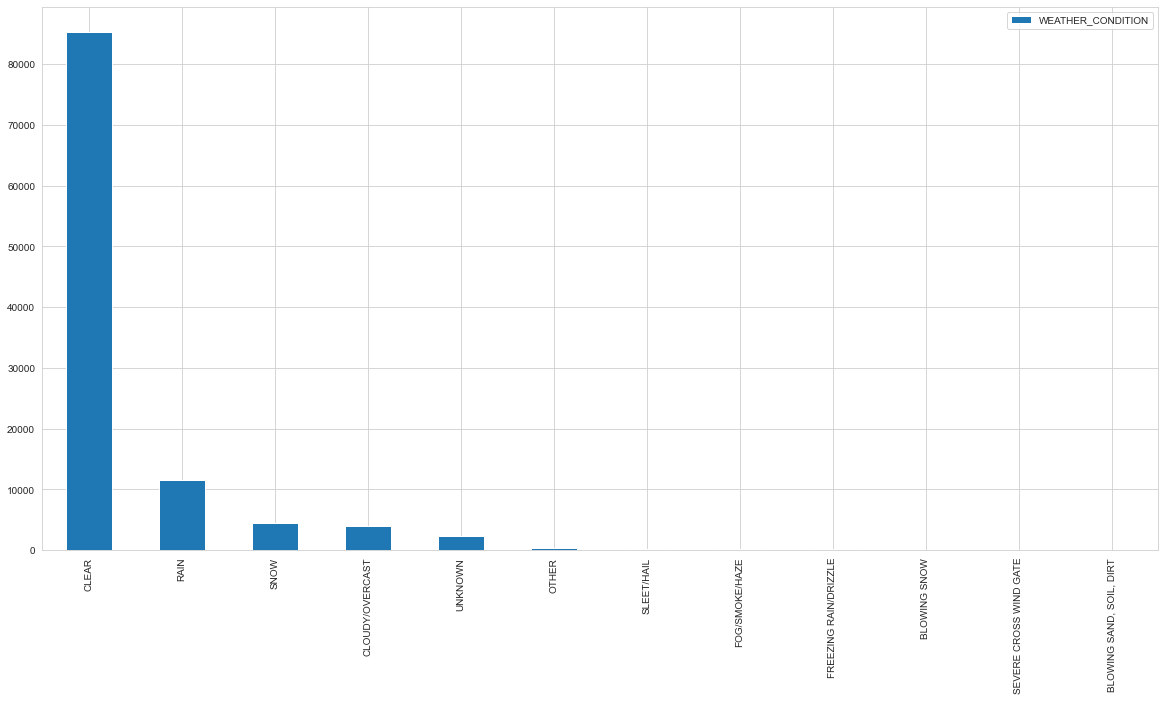

In [37]:
pd.DataFrame(crash_census['WEATHER_CONDITION'].value_counts()).plot(kind = 'bar', figsize = (20,10))
plt.set_title('Crashes in different weather conditions');


==> From the above graph we can infer that most of the accidents happen on a __clear day__. Maybe people are careless while driving on a clear day and more careful while driving on a rainy/snow day.

##### 8.2 Finding what is the LIGHTING_CONDITION  at time of crash usually


<AxesSubplot:>

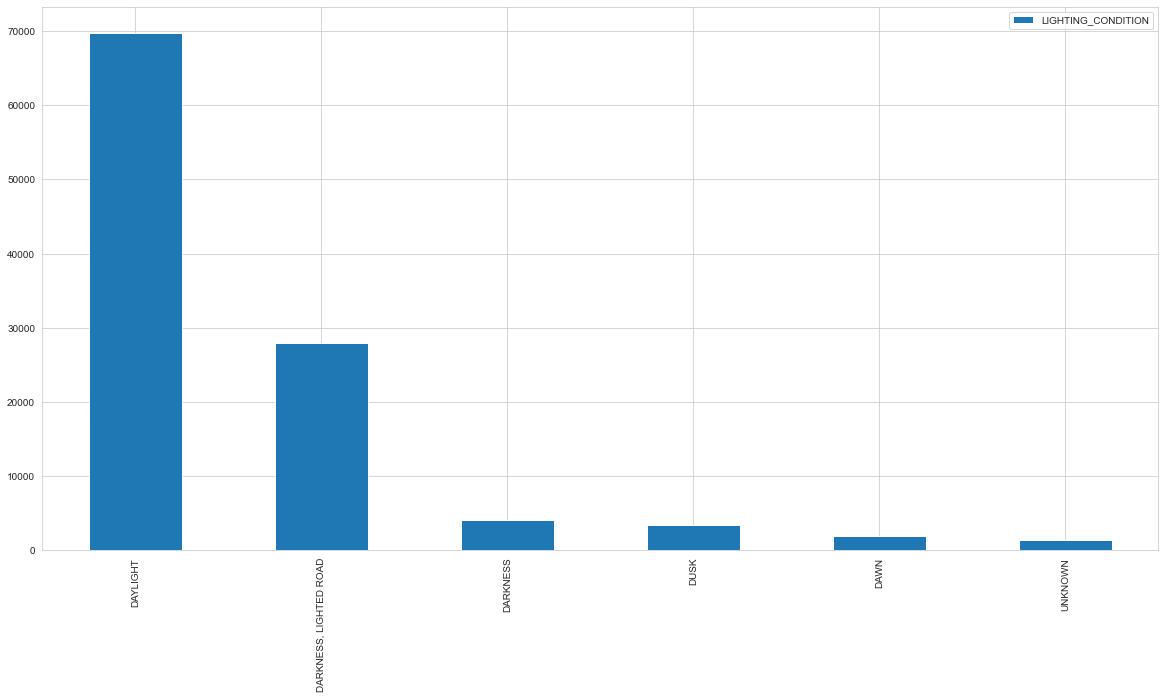

In [38]:
pd.DataFrame(crash_census['LIGHTING_CONDITION'].value_counts()).plot(kind = 'bar', figsize = (20,10))

==> From the above graph we can infer that most of the crashes happen during __day time__ . This trend in the above graph is maybe because people tend to be more careful while driving when there is more darkness.
